In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

In [2]:
data = pd.read_csv('drug.csv')
data.head()

,No.,Name,SpMin1_Bhs,C2SP2,nssO,ETA_BetaP_ns_d,MDEC_24,AVP_5,MATS4v,AATS6p,...,SpMax4_Bhe,GATS2m,GATS2p,ETA_EtaP_F,AATS2i,VC_6,Status,Lable(exp.),Lable(SVM),Lable(GRNN)
0,1,CHEMBL219517,2.036093,10,1,0.03571,0.000000,0.023095,-0.004576,1.413029,...,3.492063,0.752719,0.773633,0.98841,152.992905,0.000000,Inactive,-1,-1,-1
1,2,CHEMBL380797,2.155860,1,0,0.00000,19.761299,0.045320,-0.123684,1.009979,...,3.500519,0.853899,0.979989,0.29894,150.066076,0.608102,Inactive,-1,-1,-1
2,3,CHEMBL591362,2.001066,30,0,0.00000,4.897030,0.018730,0.047804,1.604455,...,3.826618,0.790574,1.034555,1.43473,149.285725,0.038891,Inactive,-1,-1,-1
3,4,CHEMBL465546,1.965794,0,10,0.00000,6.959624,0.032025,-0.108514,0.948248,...,3.587471,0.870408,1.156612,0.42979,154.429781,0.077245,Inactive,-1,-1,-1
4,5,CHEMBL2377306,1.811866,1,1,0.00000,0.000000,0.022625,-0.182215,0.802083,...,3.106337,0.773252,0.823627,0.77017,164.701153,0.000000,Inactive,-1,-1,-1


In [3]:
dataset=data.drop(['No.','Status', 'Lable(SVM)', 'Lable(GRNN)', 'Name', 'Name' ], axis=1)
dataset

,SpMin1_Bhs,C2SP2,nssO,ETA_BetaP_ns_d,MDEC_24,AVP_5,MATS4v,AATS6p,SpMax3_Bhi,SpMax4_Bhe,GATS2m,GATS2p,ETA_EtaP_F,AATS2i,VC_6,Lable(exp.)
0,2.036093,10,1,0.03571,0.000000,0.023095,-0.004576,1.413029,3.775860,3.492063,0.752719,0.773633,0.98841,152.992905,0.000000,-1
1,2.155860,1,0,0.00000,19.761299,0.045320,-0.123684,1.009979,3.741990,3.500519,0.853899,0.979989,0.29894,150.066076,0.608102,-1
2,2.001066,30,0,0.00000,4.897030,0.018730,0.047804,1.604455,3.865253,3.826618,0.790574,1.034555,1.43473,149.285725,0.038891,-1
3,1.965794,0,10,0.00000,6.959624,0.032025,-0.108514,0.948248,3.650220,3.587471,0.870408,1.156612,0.42979,154.429781,0.077245,-1
4,1.811866,1,1,0.00000,0.000000,0.022625,-0.182215,0.802083,3.227147,3.106337,0.773252,0.823627,0.77017,164.701153,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4745,2.101252,1,1,0.00000,10.300696,0.049126,-0.075119,0.857048,3.543815,3.327318,0.906644,1.083712,0.34654,152.032762,0.178324,1
4746,2.145873,3,1,0.03571,4.889648,0.032815,0.041713,1.199658,3.660446,3.392275,0.776864,1.038546,0.71997,149.930598,0.163092,1
4747,1.943068,10,7,0.09677,0.000000,0.026424,-0.119504,1.187840,3.694801,3.205736,0.890444,0.687394,0.96624,158.267553,0.000000,1
4748,2.036098,15,0,0.01471,0.000000,0.027639,-0.157788,1.299590,3.852331,3.634674,0.861361,0.962708,0.98292,149.416304,0.000000,1


In [4]:
x = dataset.drop(['Lable(exp.)'],axis=1)
y = dataset['Lable(exp.)']

In [5]:
x.head()

,SpMin1_Bhs,C2SP2,nssO,ETA_BetaP_ns_d,MDEC_24,AVP_5,MATS4v,AATS6p,SpMax3_Bhi,SpMax4_Bhe,GATS2m,GATS2p,ETA_EtaP_F,AATS2i,VC_6
0,2.036093,10,1,0.03571,0.000000,0.023095,-0.004576,1.413029,3.775860,3.492063,0.752719,0.773633,0.98841,152.992905,0.000000
1,2.155860,1,0,0.00000,19.761299,0.045320,-0.123684,1.009979,3.741990,3.500519,0.853899,0.979989,0.29894,150.066076,0.608102
2,2.001066,30,0,0.00000,4.897030,0.018730,0.047804,1.604455,3.865253,3.826618,0.790574,1.034555,1.43473,149.285725,0.038891
3,1.965794,0,10,0.00000,6.959624,0.032025,-0.108514,0.948248,3.650220,3.587471,0.870408,1.156612,0.42979,154.429781,0.077245
4,1.811866,1,1,0.00000,0.000000,0.022625,-0.182215,0.802083,3.227147,3.106337,0.773252,0.823627,0.77017,164.701153,0.000000


In [6]:
y.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: Lable(exp.), dtype: int64

# spliting the data into testing and training dataset and view the shape

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3182, 15) (3182,)
Test (1568, 15) (1568,)


# ANOVA F-statistic feature selection and summarizing the selected features

In [8]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# A bar chart of the feature importance scores for each input feature is created

prints the scores calculated for each input feature and the target
variable.

Feature 0: 22.763176
Feature 1: 1.762266
Feature 2: 21.039843
Feature 3: 54.158877
Feature 4: 8.428625
Feature 5: 3.099027
Feature 6: 9.403671
Feature 7: 1.558059
Feature 8: 102.598389
Feature 9: 97.616019
Feature 10: 89.999513
Feature 11: 13.263082
Feature 12: 1.036146
Feature 13: 99.562274
Feature 14: 4.734798


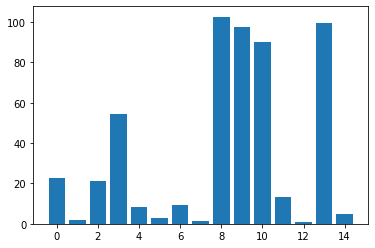

In [9]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

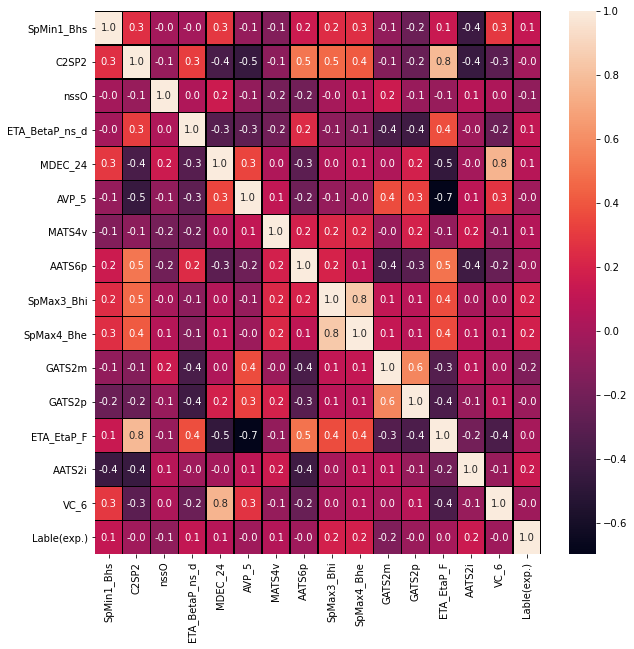

In [10]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

In [11]:
x.isnull().sum()/x.shape[0]

SpMin1_Bhs        0.0
C2SP2             0.0
nssO              0.0
ETA_BetaP_ns_d    0.0
MDEC_24           0.0
AVP_5             0.0
MATS4v            0.0
AATS6p            0.0
SpMax3_Bhi        0.0
SpMax4_Bhe        0.0
GATS2m            0.0
GATS2p            0.0
ETA_EtaP_F        0.0
AATS2i            0.0
VC_6              0.0
dtype: float64

In [12]:
y.isnull().sum()/y.shape[0]

0.0

# Support vector machine algorithm with complete dataset

In [13]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model.score(X_test, y_test)*100

56.951530612244895

In [14]:
X_train.head()

,SpMin1_Bhs,C2SP2,nssO,ETA_BetaP_ns_d,MDEC_24,AVP_5,MATS4v,AATS6p,SpMax3_Bhi,SpMax4_Bhe,GATS2m,GATS2p,ETA_EtaP_F,AATS2i,VC_6
1047,2.114628,8,2,0.01563,7.429665,0.040639,-0.193882,1.104559,3.800533,3.600914,0.856488,0.980224,0.73839,151.146799,0.195602
1690,1.962835,14,0,0.02632,0.000000,0.021729,-0.020708,1.431850,3.502395,3.123881,0.815455,1.079201,1.00672,143.125179,0.000000
4168,1.990951,16,2,0.00000,0.000000,0.024644,-0.038883,1.343020,3.889971,3.794149,0.899226,0.863204,1.13319,154.106082,0.000000
267,1.806547,13,4,0.02439,1.724615,0.021345,-0.055272,1.270155,3.856112,3.756612,0.878945,1.211895,1.24536,150.739086,0.024167
1702,1.918496,10,0,0.00000,0.000000,0.037393,0.000697,1.440692,3.737264,3.570934,0.880513,0.871130,0.90523,153.619794,0.000000


In [15]:
new_X_train = X_train.drop(['C2SP2', 'AVP_5', 'AATS6p','ETA_EtaP_F'], axis=1)
new_X_test = X_test.drop(['C2SP2', 'AVP_5', 'AATS6p','ETA_EtaP_F'], axis=1)

In [16]:
new_X_train.head()

,SpMin1_Bhs,nssO,ETA_BetaP_ns_d,MDEC_24,MATS4v,SpMax3_Bhi,SpMax4_Bhe,GATS2m,GATS2p,AATS2i,VC_6
1047,2.114628,2,0.01563,7.429665,-0.193882,3.800533,3.600914,0.856488,0.980224,151.146799,0.195602
1690,1.962835,0,0.02632,0.000000,-0.020708,3.502395,3.123881,0.815455,1.079201,143.125179,0.000000
4168,1.990951,2,0.00000,0.000000,-0.038883,3.889971,3.794149,0.899226,0.863204,154.106082,0.000000
267,1.806547,4,0.02439,1.724615,-0.055272,3.856112,3.756612,0.878945,1.211895,150.739086,0.024167
1702,1.918496,0,0.00000,0.000000,0.000697,3.737264,3.570934,0.880513,0.871130,153.619794,0.000000


In [17]:
model2 = svm.SVC()
model2.fit(new_X_train, y_train)
prediction = model2.predict(new_X_test)
model2.score(new_X_test, y_test)*100

56.951530612244895

# Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)
prediction = model3.predict(X_test)
model3.score(X_test, y_test)*100

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


66.07142857142857

In [19]:
model4 = LogisticRegression()
model4.fit(new_X_train, y_train)
prediction = model4.predict(new_X_test)
model4.score(new_X_test, y_test)*100

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


61.224489795918366

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision tree classifier

In [21]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)
dt_model.score(X_test, y_test)*100

70.1530612244898

# support vector machine

In [22]:
model5 = svm.SVC()
model5.fit(X_train, y_train)
prediction = model5.predict(X_test)
model5.score(X_test, y_test)*100

56.951530612244895

# Random forest classifier

In [23]:
randfForest = RandomForestClassifier()
randfForest.fit(X_train, y_train)
prediction = randfForest.predict(X_test)
randfForest.score(X_test, y_test)*100

79.33673469387756

# Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
gau_classifier = GaussianNB()
gau_classifier.fit(X_train, y_train)
pre = gau_classifier.predict(X_test)
gau_classifier.score(X_test, y_test)*100

61.60714285714286

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_claasifier = KNeighborsClassifier(n_neighbors=3)
knn_claasifier.fit(X_train, y_train)
pred = knn_claasifier.predict(X_test)
knn_claasifier.score(X_test, y_test)*100

72.1938775510204

In [26]:
X_train

,SpMin1_Bhs,C2SP2,nssO,ETA_BetaP_ns_d,MDEC_24,AVP_5,MATS4v,AATS6p,SpMax3_Bhi,SpMax4_Bhe,GATS2m,GATS2p,ETA_EtaP_F,AATS2i,VC_6
1047,2.114628,8,2,0.01563,7.429665,0.040639,-0.193882,1.104559,3.800533,3.600914,0.856488,0.980224,0.73839,151.146799,0.195602
1690,1.962835,14,0,0.02632,0.000000,0.021729,-0.020708,1.431850,3.502395,3.123881,0.815455,1.079201,1.00672,143.125179,0.000000
4168,1.990951,16,2,0.00000,0.000000,0.024644,-0.038883,1.343020,3.889971,3.794149,0.899226,0.863204,1.13319,154.106082,0.000000
267,1.806547,13,4,0.02439,1.724615,0.021345,-0.055272,1.270155,3.856112,3.756612,0.878945,1.211895,1.24536,150.739086,0.024167
1702,1.918496,10,0,0.00000,0.000000,0.037393,0.000697,1.440692,3.737264,3.570934,0.880513,0.871130,0.90523,153.619794,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.864863,10,0,0.03704,1.809497,0.023390,0.125028,1.253555,3.685371,3.413550,0.694390,1.061879,1.05488,160.467150,0.004500
2763,2.072120,0,2,0.00000,6.080465,0.053687,-0.170793,1.004803,3.631310,3.504331,0.917727,1.195702,0.34063,152.143088,0.092698
905,1.701424,4,0,0.02273,0.000000,0.022017,0.149017,1.314814,3.732190,3.244596,0.725000,1.159881,0.82793,157.816580,0.000000
3980,2.064065,12,3,0.06250,0.000000,0.026215,-0.141125,1.427658,3.593040,3.229266,0.628045,0.638087,1.08818,152.741885,0.025193


In [27]:
test_x = np.array([[2.036093,10,1,0.03571,0.000000,0.023095,-0.004576,1.413029,3.775860,3.492063,0.752719,0.773633,0.98841,152.992905,0.000000]])
y_predict =randfForest.predict(test_x)
   
y_predict

array([-1], dtype=int64)

In [28]:
import pickle

In [32]:
"""
data = {'model': randfForest, "SpMin1_Bhs":SpMin1_Bhs,
        "C2SP2":C2SP2,
        "nssO":nssO,
        "ETA_BetaP_ns_d":ETA_BetaP_ns_d,
        "MDEC_24":MDEC_24,
        'AVP_5':AVP_5,
        "MATS4v":MATS4v,
        "AATS6p":AATS6p,
        "SpMax3_Bhi":SpMax3_Bhi,
        "SpMax4_Bhe":SpMax4_Bhe,
        "GATS2m":GATS2m,
        "GATS2p":GATS2p,
        "ETA_EtaP_F":ETA_EtaP_F,
        "AATS2i":AATS2i,
        "VC_6":VC_6}"""

data = {'model': randfForest}

with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [33]:
with open('saved_steps.pkl', 'rb') as file:
    pickle.load(file)

In [34]:
model_loaded = data['model']

In [35]:
y_pred = model_loaded.predict(test_x)
y_pred

array([-1], dtype=int64)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [23,17,35,29,12]
ax.bar(langs,students)
plt.show()